In [1]:
import re
import matplotlib.pylab as plt

1. Распарсите файл references при помощи регулярных выражений и запишите оттуда все ftp ссылки в файл ftps
https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references

    Об ftp ссылках
    https://en.wikipedia.org/wiki/File_Transfer_Protocol#Syntax


In [3]:
with open("references.txt", "r") as ref:
    ftps = []
    while True:
        line = ref.readline()
        ftps += re.findall('(?:(?:ftp):\/\/)?[\w/\-?=%.#]+\.[\w/\-&?=%.]+', line)
        if not line:
            break
    with open("ftps.txt", "w+") as out:
        for ss in ftps:
            out.write(ss)
            out.write("\n")

2. Извлеките из рассказа  2430 A.D. все числа
https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD

In [4]:
with open("2430AD.txt", "r") as ad:
    numbers = []
    while True:
        line = ad.readline()
        numbers += re.findall(r"([0-9][-.\w]*)", line)
        if not line:
            break
    with open("numbers_ad.txt", "w+") as out:
        for number in numbers:
            out.write(number)
            out.write("\n")

3. Из того же рассказа извлеките все слова, в которых есть буква a, регистр при этом не важен

In [5]:
with open("2430AD.txt", "r") as ad:
    awords = []
    while True:
        line = ad.readline()
        awords += re.findall(r"\w*[aA]\w*", line)
        if not line:
            break
    with open("awords.txt", "w+") as out:
        for aword in awords:
            out.write(aword)
            out.write("\n")

4. Извлеките из рассказа все восклицательные предложения

In [6]:
with open("2430AD.txt", "r") as ad:
    excls = []
    while True:
        line = ad.readline()
        excls += re.findall(r"[\w\s]*\!+", line)
        if not line:
            break
    with open("excl.txt", "w+") as out:
        for excl in excls:
            out.write(excl)
            out.write("\n")

5. Постройте гистограмму распределения длин уникальных слов (без учёта регистра, длина от 1) в тексте. То есть по оси x идёт длина слова. По оси y идёт доля слов с такой длиной среди уникальных слов, найденных в тексте. При этом слова the и The считаются одним словом, то есть регистр не важен


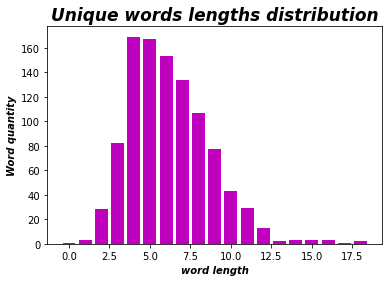

In [10]:
with open("2430AD.txt", "r") as ad:
    words = []
    wordslen = {}
    while True:
        line = ad.readline()
        line_new = re.sub(r"[.\!\?\:,()\"-]+", "", line)
        for word in line_new.lower().split(" "):
            if word not in words:
                words += [word]
                if len(word) not in wordslen:
                    wordslen[len(word)] = 1
                else:
                    wordslen[len(word)] += 1
        if not line:
            break
plt.bar(list(wordslen.keys()), wordslen.values(), color='m')
plt.title("Unique words lengths distribution", weight='bold', style = 'italic', size = 17)
plt.xlabel("word length", weight='bold', style = 'italic')
plt.ylabel("Word quantity", style = 'italic', weight='bold')
plt.show()   

6. Сделайте функцию-переводчик с русского на "кирпичный язык"
https://yandex.ru/q/question/kirpichnyi_iazyk_kak_govorit_cc88f9dc/

In [15]:
stri = 'Слушай, а ловко ты это придумал, я даже сначала не понял' 
def brick_translator(stroka):
    replacements = {"э": "экэ", "е": "еке", "ы": "ыкы", 
                "а": "ака", "у": "уку", "я": "якя", 
                "и": "ики", "ю": "юкю", "о": "око"}
    def func(matchobj): return replacements.get(matchobj.group(), "")
    return re.sub("[уеыаоэяию]", func, stroka.lower(), flags=re.IGNORECASE)
brick_translator(stri)

'укушакай, ака локовкоко тыкы экэтоко прикидукумакал, якя дакажеке снакачакалака неке поконякял'

7. Сделайте функцию для извлечения из текста предложений с заданным количеством слов (предлоги и союзы считаем за слова).   
Функция должна принимать 2 аргумента: текст в виде строки и кол-во слов в предложении. Функция должна возвращать список кортежей, каждый из которых содержит отдельные слова из найденных предложений. Например, find_n_words_sentences("Здесь три слова. Здесь тоже три", 3) -> [("Здесь", "три", "слова"), ("Здесь", "тоже", "три")]

In [7]:
def find_n_words_sentences(stroka, n):
    sentences = re.split('[?!.][\s]*',stroka)
    splitted = []
    for sntnce in sentences:
        if len(sntnce.split(" ")) == n:
            splitted += [tuple(sntnce.split(" "))]
    return splitted
    
find_n_words_sentences("Their footsteps were muted against the plastic-knit crushed rock underfoot. They passed crosscorridors and saw the endless crowds on the Moving Strips in the middle distance. There was a fugitive whiff of plankton in its varieties. Once, almost by instinct, they could tell that up above, far above, was one of the giant conduits leading in from the sea. And by symmetry they knew there would be another conduit, just as large, far below, leading out to sea.", 10)

[('Their',
  'footsteps',
  'were',
  'muted',
  'against',
  'the',
  'plastic-knit',
  'crushed',
  'rock',
  'underfoot'),
 ('There',
  'was',
  'a',
  'fugitive',
  'whiff',
  'of',
  'plankton',
  'in',
  'its',
  'varieties')]